In [1]:
%matplotlib inline

# Pytorch 线性回归
Pytorch可以选择使用GPU/CPU完成运算过程，本例中为使用CPU运算

In [2]:
# -*- coding: utf-8 -*-

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from six.moves import xrange

In [3]:
# 生成数据
import numpy as np

x_data = np.linspace(start=-1, stop=1, num=50)

# x表示输入，y表示输出，y_表示y(hat)预测值
# 噪声～正态分布，服从均值为0，方差为0.2
y_data = 2 * x_data + 0.1
y_data_noise = y_data + np.random.normal(loc=0, scale=0.2, size=x_data.shape)


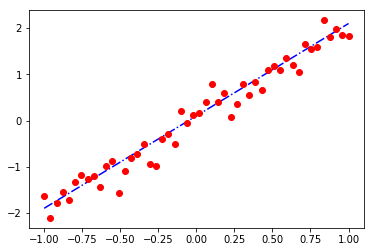

In [4]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'b-.')
plt.plot(x_data, y_data_noise, 'ro')
plt.show()

In [5]:
# hyperparameter
training_episode = 10000
learning_rate = 0.001

import torch
from torch.autograd import Variable
import torch.nn as nn

model = nn.Linear(1, 1)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training
for i in xrange(1, 1+training_episode):
    x = Variable(torch.Tensor(x_data[..., None]))
    y = Variable(torch.Tensor(y_data_noise[..., None]))
    
    optimizer.zero_grad() # Pytorch中的梯度是累加的，需要手动清空
    y_ = model(x) # forward
    loss = criterion(y_, y) # 计算loss/cost
    loss.backward() # back-propagation
    optimizer.step() # 更新权重

    if i % 1000 == 0:
        a, b = model.state_dict().values()
        torchTensor2scalar = lambda x: x.numpy()
        a, b, loss = torchTensor2scalar(a)[0, 0], torchTensor2scalar(b)[0], float(loss.data.numpy())
        print('Epoch %s / %s: loss = %s, y = %s * x + %s' % (
            i , training_episode, loss, a, b))

Epoch 1000 / 10000: loss = 0.5276861190795898, y = 0.83229965 * x + 0.14901976
Epoch 2000 / 10000: loss = 0.16950233280658722, y = 1.4105645 * x + 0.06141399
Epoch 3000 / 10000: loss = 0.08246859908103943, y = 1.6994169 * x + 0.0495815
Epoch 4000 / 10000: loss = 0.060795292258262634, y = 1.8437016 * x + 0.04798335
Epoch 5000 / 10000: loss = 0.05538814514875412, y = 1.9157751 * x + 0.047767486
Epoch 6000 / 10000: loss = 0.05403903126716614, y = 1.9517761 * x + 0.04773832
Epoch 7000 / 10000: loss = 0.05370238795876503, y = 1.9697595 * x + 0.047734674
Epoch 8000 / 10000: loss = 0.0536184124648571, y = 1.9787422 * x + 0.047734674
Epoch 9000 / 10000: loss = 0.05359746515750885, y = 1.9832292 * x + 0.047734674
Epoch 10000 / 10000: loss = 0.053592223674058914, y = 1.9854697 * x + 0.047734674


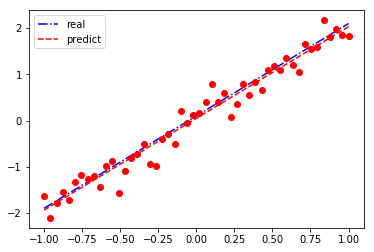

In [6]:
plt.plot(x_data, y_data, 'b-.', label='real')
plt.plot(x_data, a * x_data + b, 'r--', label='predict')
plt.plot(x_data, y_data_noise, 'ro')

plt.legend()
plt.show()